# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [56]:
#your turn
df = pd.merge(df_offers, df_transactions)
#create matrix with customer name as index and one column for each offer
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()
print(matrix.head())

offer_id customer_name    1    2    3    4    5    6    7    8    9 ...    23  \
0                Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
1                Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
2             Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
3               Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
4                Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   

offer_id   24   25   26   27   28   29   30   31   32  
0         0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
1         0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2         1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 33 columns]


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 


<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

<li> What values of $SS$ do you believe represent better clusterings? Why? <ul>
The $SS$ value at where the increase of K start to see slowing decrease of $SS$ is the ideal value that represents optimal clustering, because it is the point between the trade-off of $SS$ reduction and overfitting clusters.

In [57]:
#Create a numpy matrix x_cols with only the columns representing the offers (i.e. the 0/1 colums)
import numpy as np
x_cols = matrix.drop(['customer_name'], axis=1)
x_cols = np.matrix(x_cols)
print(x_cols)

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  1.]]


In [90]:
from sklearn.cluster import KMeans
model = KMeans(random_state=10)

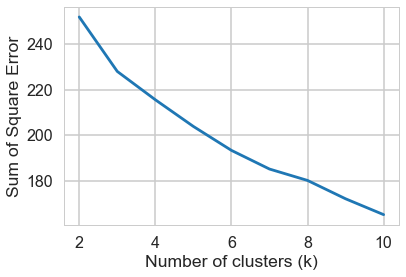

In [209]:
cluster_k = [2,3,4,5,6,7,8,9,10]
y_cols = []

for k in cluster_k:
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(x_cols)
    y_cols.append(model.inertia_)

plt.plot(cluster_k,y_cols)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Square Error")
plt.show()

The "knee-elbow" graph shows slight flattening of decreasing SS as k increases. We can see little difference between 4 and 8 clusters. In this case, we can arbitrary determine the best k would be 5.

<Container object of 5 artists>

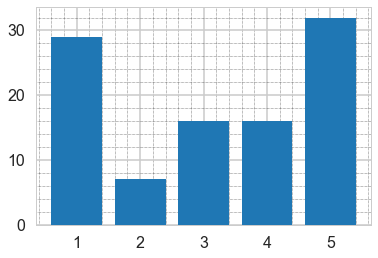

In [187]:
model = KMeans(n_clusters=5, random_state=10)
model.fit(x_cols)
cluster_value = model.predict(x_cols)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

As seen above, the number of data points in each cluster varies greatly. Since the SS improvement is about the same with different k values, it is difficult to pick the ideal k value for building the model.

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.


<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [210]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
# Because the matrix has 32 features instead of 2, 
#we would have to use PCA to reduce the dimensions down to 2 to create the silhouette plots

# do pca to get first 2 principle components
pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(x_cols))

matrix['x'] = pca.fit_transform(x_cols)[:,0]
matrix['y'] = pca.fit_transform(x_cols)[:,1]


pc = matrix[['x', 'y']]
print(pc.head())

offer_id         x         y
0         1.007580  0.108215
1        -0.287539  0.044715
2        -0.392032  1.038391
3         0.699477 -0.022542
4         0.088183 -0.471695


For n_clusters = 2 The average silhouette score is : 0.412206549058
For n_clusters = 3 The average silhouette score is : 0.530346804784
For n_clusters = 4 The average silhouette score is : 0.448801293799
For n_clusters = 5 The average silhouette score is : 0.470122949069
For n_clusters = 6 The average silhouette score is : 0.471284542472
For n_clusters = 7 The average silhouette score is : 0.497066912229
For n_clusters = 8 The average silhouette score is : 0.513855732063
For n_clusters = 9 The average silhouette score is : 0.511435408316
For n_clusters = 10 The average silhouette score is : 0.511174551035


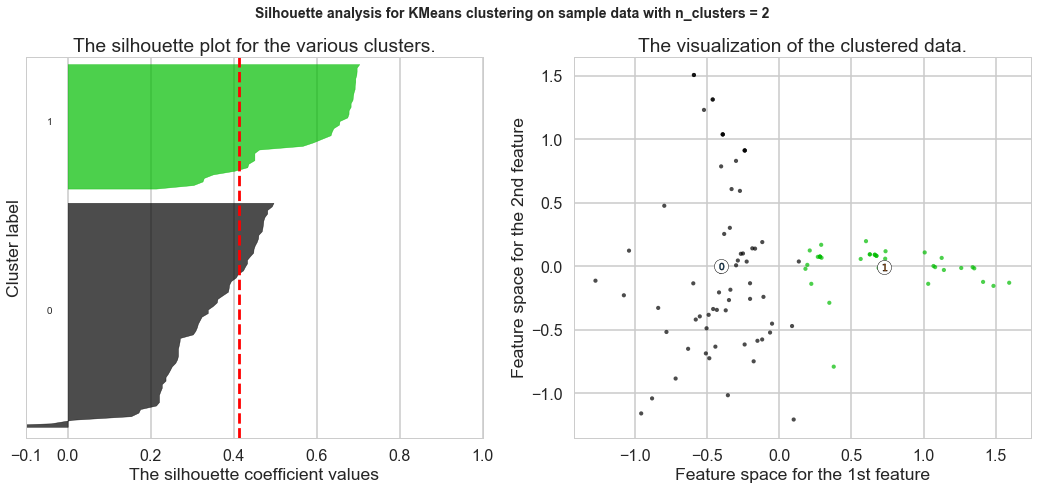

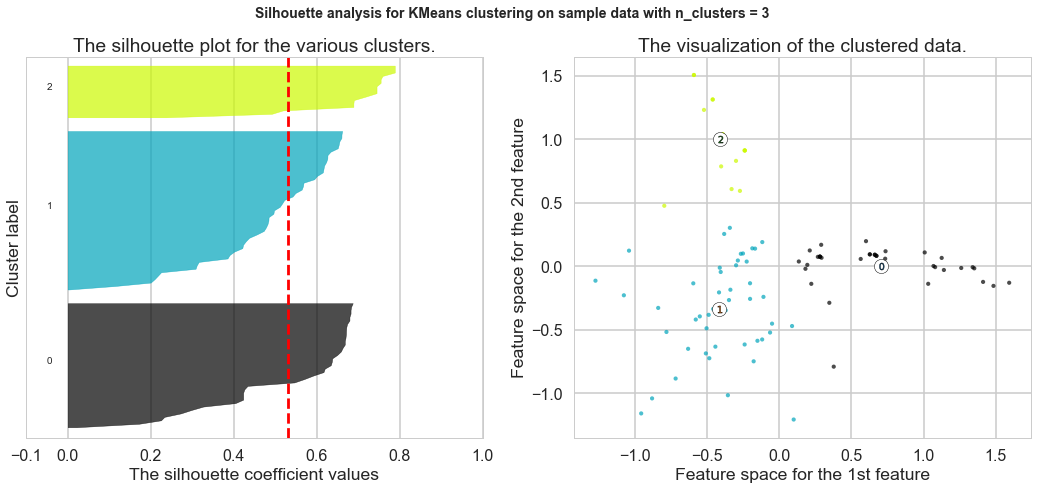

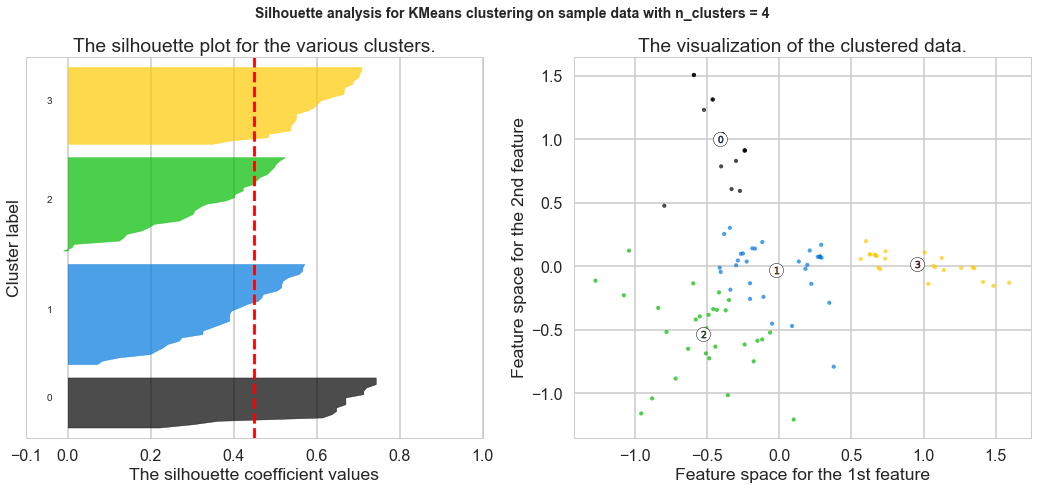

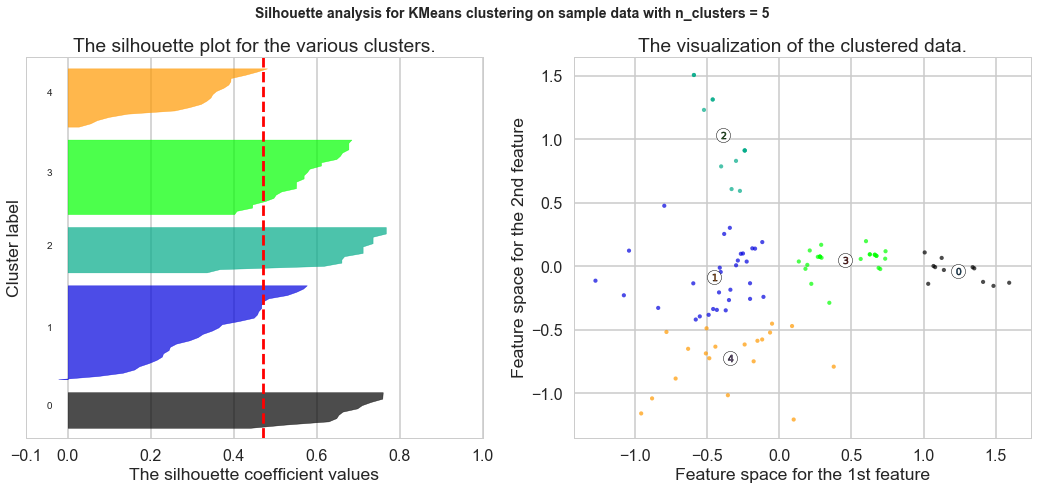

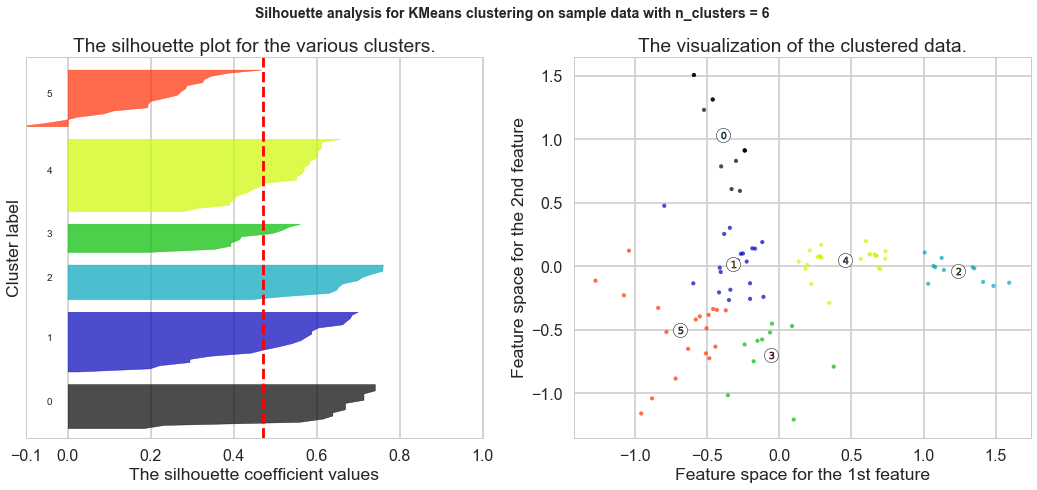

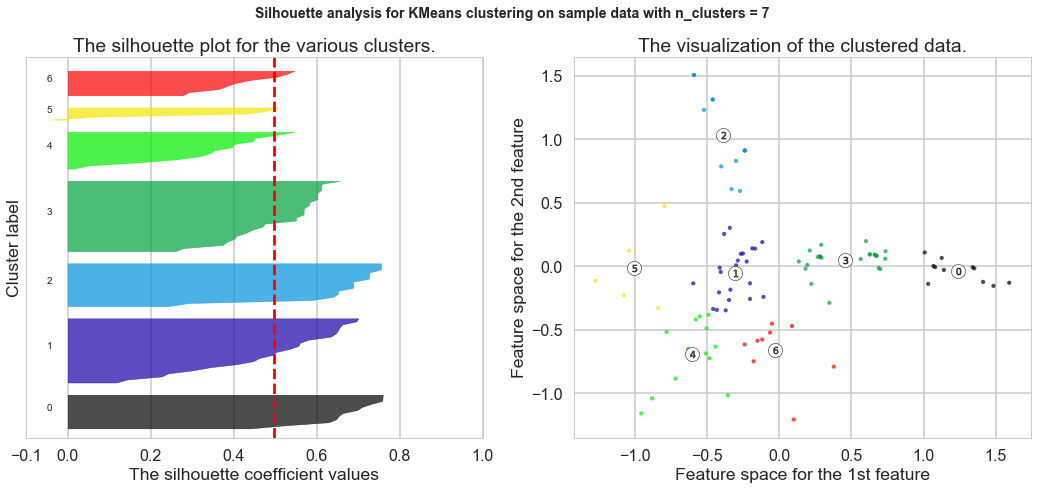

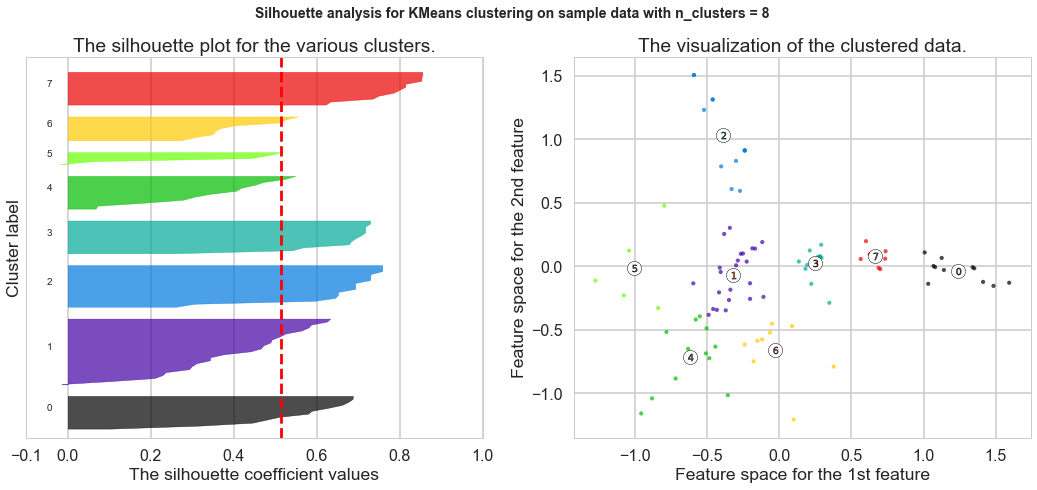

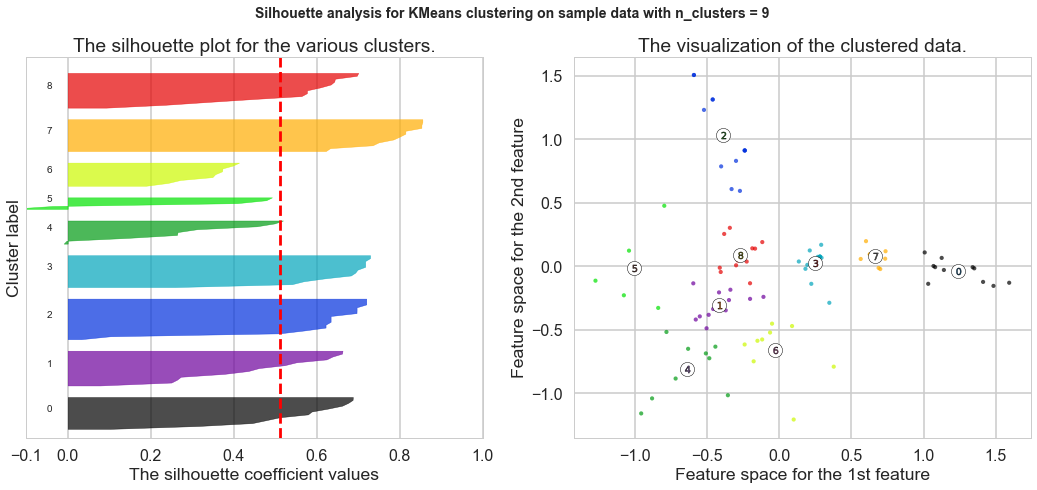

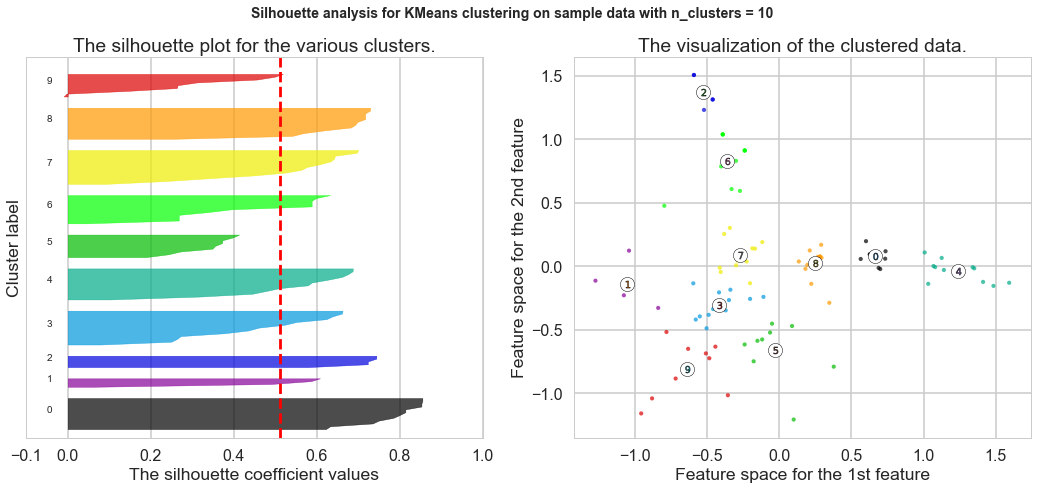

In [663]:
import matplotlib.cm as cm
import numpy as np

for k in cluster_k:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pc) + k * 3.5])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(pc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pc, cluster_labels)
    print("For n_clusters =", k,"The average silhouette score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pc, cluster_labels)

    y_lower = 3
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / k)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 3  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / k)
    ax2.scatter(pc['x'], pc['y'], marker='.', s=70, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

 <b>Exercise:</b>: Compute the average silhouette score for each K and plot it. What K does the plot suggest we should choose? Does it differ from what we found using the Elbow method?
 
 <p>Since the Elbow method only shows the aggregated improvement as K increases, it is not easy to pick the ideal K when the log like curve is not visible. However, we can confidently choose K as 3 because of the average silhouette score of 0.53 with 3 clusters is higher than other K values.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.


<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [378]:
#your turn
# As mentioned above, because the matrix has 32 features instead of 2, 
#we needed to use PCA to reduce the dimensions down to 2 to create the silhouette plots.

#to tag cluster IDs to the customers with number of clusters as 3.
clusterer = KMeans(n_clusters=3, random_state=10)
matrix['cluster_id'] = clusterer.fit_predict(pc)

df_pca = matrix[['customer_name','cluster_id','x','y']]

print(df_pca.head())

offer_id customer_name  cluster_id         x         y
0                Adams           0  1.007580  0.108215
1                Allen           1 -0.287539  0.044715
2             Anderson           2 -0.392032  1.038391
3               Bailey           0  0.699477 -0.022542
4                Baker           1  0.088183 -0.471695


Text(0.5,1,'PCA Clusters')

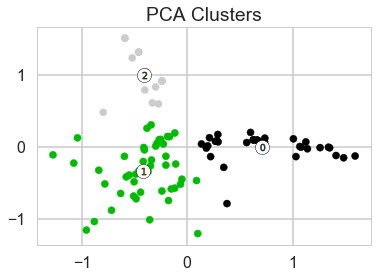

In [300]:
plt.scatter(df_pca['x'],df_pca['y'], c=df_pca['cluster_id'], s=50)
centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
plt.title('PCA Clusters')

The Principal Component Analysis shows that K as 3 is separates all of the clusters nicely. It overall produced a good visual result, which also worked well with silhouette score.

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>

We will pick cluster 0 see what story it can tell us about the offers and transactions related to the cluster.

In [315]:
cluster_id = matrix[['cluster_id','customer_name']]
df = pd.merge(df_transactions, cluster_id)
df = pd.merge(df_offers, df)
print(df.head())

   offer_id campaign varietal  min_qty  discount  origin  past_peak  \
0         1  January   Malbec       72        56  France      False   
1         1  January   Malbec       72        56  France      False   
2         1  January   Malbec       72        56  France      False   
3         1  January   Malbec       72        56  France      False   
4         1  January   Malbec       72        56  France      False   

  customer_name  n  cluster_id  
0        Thomas  1           1  
1       Jackson  1           1  
2      Mitchell  1           1  
3      Peterson  1           2  
4          Wood  1           1  


In [329]:
df['is_0'] = df.cluster_id==0
df.groupby("is_0").varietal.value_counts()

is_0   varietal          
False  Champagne             75
       Pinot Noir            44
       Cabernet Sauvignon    30
       Prosecco              23
       Chardonnay            14
       Malbec                14
       Merlot                13
       Espumante              8
       Pinot Grigio           1
True   Espumante             32
       Prosecco              20
       Malbec                18
       Pinot Grigio          16
       Merlot                 7
       Champagne              6
       Cabernet Sauvignon     2
       Chardonnay             1
Name: varietal, dtype: int64

In [330]:
df.groupby("is_0")[['min_qty', 'discount']].mean()

,min_qty,discount
is_0,,
False,77.513514,61.243243
True,16.823529,55.647059


From the varietal data, almost all of the offers of Pinot Grigio go to the customers in cluster 0. Interestingly, these customers purchases more than half of all Espumoante and Prosecco offers but not Champagne. On the other hand, these customers tend to buy less in bulk, they mostly prefer offers of 6 bottles.


<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

[ 0.4096489   0.30753551  0.2022926   0.16703717  0.15015248  0.1434373
  0.13818887  0.12192294  0.11636172  0.10804271  0.09937813  0.09495961
  0.08690352  0.07256738  0.0660996   0.06245473  0.05634388  0.05327395
  0.04728801  0.04393911  0.03900424  0.03625783  0.03455714  0.03235091
  0.02940632  0.02618221  0.02308167  0.02142632  0.018814    0.0165252
  0.01426187  0.0077789 ]


Text(0.5,1,'Variance explained by PCA vectors')

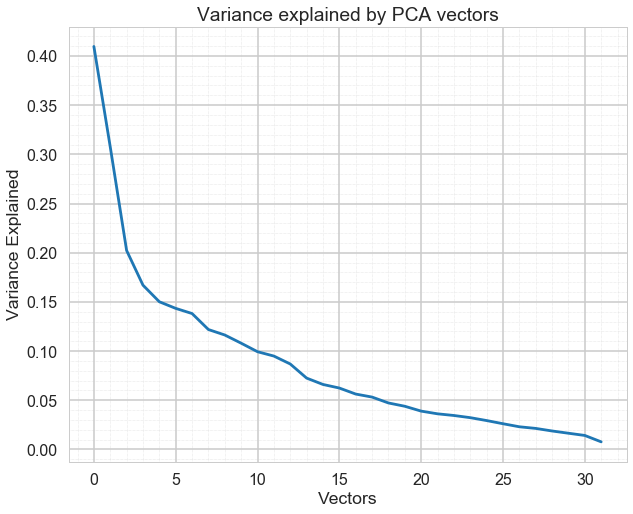

In [361]:
#your turn
# Initialize a new PCA model with a default number of components.
pca = PCA()
pca_all = pca.fit(x_cols)
print(pca_all.explained_variance_)  

plt.figure(figsize=(10,8))
plt.plot(pca_all.explained_variance_)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.ylabel('Variance Explained')
plt.xlabel('Vectors')
plt.title('Variance explained by PCA vectors')

From the chart above, we can see that the curve of the variance explained slowed down at about 3 or 4 vectors. This means the majority of the variance in the data can be explained by 3 or 4 PCA vectors.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn

![Algorithms.png](attachment:Algorithms.png)

Source: http://scikit-learn.org/stable/modules/clustering.html


<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [381]:
#For the following clustering methods,
#we can use the 2 dimension data that was reduced by PCA to make comparison with the KMeans method in exercise IV.
print(pc.head())

offer_id         x         y
0         1.007580  0.108215
1        -0.287539  0.044715
2        -0.392032  1.038391
3         0.699477 -0.022542
4         0.088183 -0.471695


In [666]:
#Import all clustering methods
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#We will use only silhouette score to evaluate the algorithms since we do not have real labels.

In [533]:
#1 Affinity propagation

pc_AP = AffinityPropagation().fit(pc)
pc_AP_label = pc_AP.labels_

print('Estimated number of clusters: %d' % len(pc_AP.cluster_centers_indices_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, pc_AP_label))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, pc_AP_label))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, pc_AP_label))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pc, pc_AP_label))

Estimated number of clusters: 10
Homogeneity: 0.968
Completeness: 0.438
Adjusted Rand Index: 0.303
Silhouette Coefficient: 0.506


Text(0.5,1,'PCA Clusters w/ Affinity propagation')

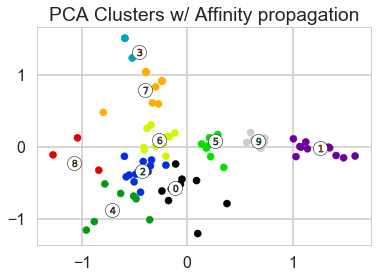

In [534]:
plt.scatter(df_pca['x'],df_pca['y'], c=pc_AP_label, s=50)
centers = pc_AP.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
plt.title('PCA Clusters w/ Affinity propagation')

In [434]:
#2 Spectral clustering

#Since we found that the ideal number of clusters for the reduced dimensions is 3, 
#we will also use 3 as the number of clusters for this method.

SC_clusterer = SpectralClustering(n_clusters=3).fit(pc)
SC_labels = SC_clusterer.fit_predict(pc)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, SC_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, SC_labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, SC_labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pc, SC_labels))

Homogeneity: 0.915
Completeness: 0.908
Adjusted Rand Index: 0.938
Silhouette Coefficient: 0.528


In [424]:
best_score_SC = 0
for k in cluster_k:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    SC_clusterer = SpectralClustering(n_clusters=k).fit(pc)
    SC_labels = SC_clusterer.fit_predict(pc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pc, SC_labels)
    if silhouette_avg > best_score_SC:
        best_score_SC = silhouette_avg
        ideal_k = k
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
print("")
print("Ideal n_clusters =", ideal_k,"The best average silhouette_score is: %0.3f" % best_score_SC)

For n_clusters = 2 The average silhouette_score is : 0.409331992782
For n_clusters = 3 The average silhouette_score is : 0.527924745848
For n_clusters = 4 The average silhouette_score is : 0.446425859331
For n_clusters = 5 The average silhouette_score is : 0.460901339336
For n_clusters = 6 The average silhouette_score is : 0.470753324711
For n_clusters = 7 The average silhouette_score is : 0.405660439858
For n_clusters = 8 The average silhouette_score is : 0.460875299649
For n_clusters = 9 The average silhouette_score is : 0.418371758921
For n_clusters = 10 The average silhouette_score is : 0.500880737726

Ideal n_clusters = 3 The best average silhouette_score is: 0.528


Text(0.5,1,'PCA Clusters w/ Spectral clustering')

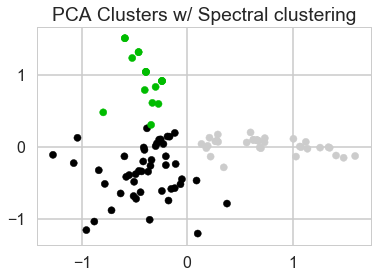

In [531]:
plt.scatter(df_pca['x'],df_pca['y'], c=SC_labels, s=50)
#centers = SC_clusterer.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], marker='o',
#                c="white", alpha=1, s=200, edgecolor='k')
#for i, c in enumerate(centers):
#        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                    s=50, edgecolor='k')
plt.title('PCA Clusters w/ Spectral clustering')

In [438]:
#3 Agglomerative clustering

AC_clusterer = AgglomerativeClustering(n_clusters=3).fit(pc)
AC_labels = AC_clusterer.fit_predict(pc)

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, AC_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, AC_labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pc, AC_labels))

Completeness: 0.955
Adjusted Rand Index: 0.964
Silhouette Coefficient: 0.531


Linkage method: ward linkage
For n_clusters = 2 The average silhouette_score is: 0.410735563157
For n_clusters = 3 The average silhouette_score is: 0.531236409181
For n_clusters = 4 The average silhouette_score is: 0.496026426605
For n_clusters = 5 The average silhouette_score is: 0.437278589605
For n_clusters = 6 The average silhouette_score is: 0.468661790442
For n_clusters = 7 The average silhouette_score is: 0.48939197305
For n_clusters = 8 The average silhouette_score is: 0.479927447989
For n_clusters = 9 The average silhouette_score is: 0.501111280279
For n_clusters = 10 The average silhouette_score is: 0.506249983558

Ideal n_clusters = 3 The best average silhouette_score is: 0.531


Text(0.5,1,'PCA Clusters w/ Agglomerative clustering on ward linkage')

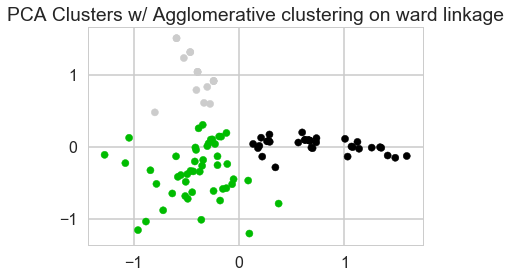

In [480]:
best_score_AC = 0
print('Linkage method: ward linkage')
for k in cluster_k:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    AC_clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(pc)
    AC_labels = AC_clusterer.fit_predict(pc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pc, AC_labels)
    if silhouette_avg > best_score_AC:
        best_score_AC = silhouette_avg
        ideal_k = k
    print("For n_clusters =", k,"The average silhouette_score is:", silhouette_avg)
AC_clusterer = AgglomerativeClustering(n_clusters=ideal_k, linkage='ward').fit(pc)
AC_labels = AC_clusterer.fit_predict(pc)
print("")
print("Ideal n_clusters =", ideal_k,"The best average silhouette_score is: %0.3f" % best_score_AC)
plt.scatter(df_pca['x'],df_pca['y'], c=AC_labels, s=50)
plt.title('PCA Clusters w/ Agglomerative clustering on ward linkage')

Linkage method: complete linkage
For n_clusters = 2 The average silhouette_score is: 0.367006117799
For n_clusters = 3 The average silhouette_score is: 0.50080474546
For n_clusters = 4 The average silhouette_score is: 0.429633570447
For n_clusters = 5 The average silhouette_score is: 0.431043446695
For n_clusters = 6 The average silhouette_score is: 0.430335437705
For n_clusters = 7 The average silhouette_score is: 0.444247580953
For n_clusters = 8 The average silhouette_score is: 0.435002751919
For n_clusters = 9 The average silhouette_score is: 0.412260940699
For n_clusters = 10 The average silhouette_score is: 0.451531000637

Ideal n_clusters = 3 The best average silhouette_score is: 0.501


Text(0.5,1,'PCA Clusters w/ Agglomerative clustering on complete linkage')

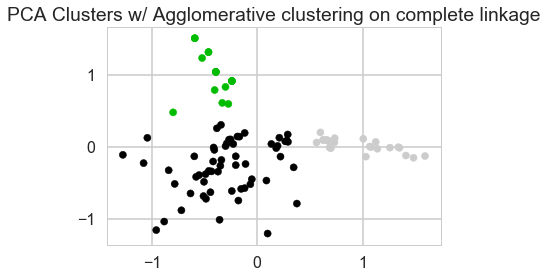

In [482]:
best_score_AC = 0
print('Linkage method: complete linkage')
for k in cluster_k:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    AC_clusterer = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(pc)
    AC_labels = AC_clusterer.fit_predict(pc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pc, AC_labels)
    if silhouette_avg > best_score_AC:
        best_score_AC = silhouette_avg
        ideal_k = k
    print("For n_clusters =", k,"The average silhouette_score is:", silhouette_avg)
AC_clusterer = AgglomerativeClustering(n_clusters=ideal_k, linkage='complete').fit(pc)
AC_labels = AC_clusterer.fit_predict(pc)
print("")
print("Ideal n_clusters =", ideal_k,"The best average silhouette_score is: %0.3f" % best_score_AC)
plt.scatter(df_pca['x'],df_pca['y'], c=AC_labels, s=50)
plt.title('PCA Clusters w/ Agglomerative clustering on complete linkage')

Linkage method: average linkage
For n_clusters = 2 The average silhouette_score is: 0.41237666002
For n_clusters = 3 The average silhouette_score is: 0.531236409181
For n_clusters = 4 The average silhouette_score is: 0.467899805368
For n_clusters = 5 The average silhouette_score is: 0.441833142804
For n_clusters = 6 The average silhouette_score is: 0.45270650185
For n_clusters = 7 The average silhouette_score is: 0.463650368439
For n_clusters = 8 The average silhouette_score is: 0.413019816941
For n_clusters = 9 The average silhouette_score is: 0.446592975159
For n_clusters = 10 The average silhouette_score is: 0.46324085348

Ideal n_clusters = 3 The best average silhouette_score is: 0.531


Text(0.5,1,'PCA Clusters w/ Agglomerative clustering on average linkage')

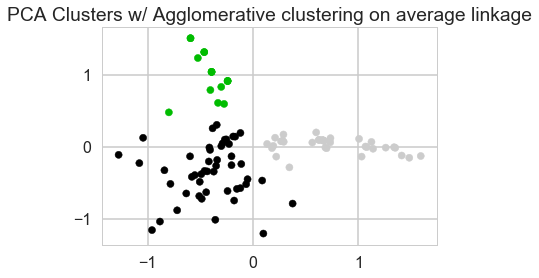

In [483]:
best_score_AC = 0
print('Linkage method: average linkage')
for k in cluster_k:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    AC_clusterer = AgglomerativeClustering(n_clusters=k, linkage='average').fit(pc)
    AC_labels = AC_clusterer.fit_predict(pc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pc, AC_labels)
    if silhouette_avg > best_score_AC:
        best_score_AC = silhouette_avg
        ideal_k = k
    print("For n_clusters =", k,"The average silhouette_score is:", silhouette_avg)
AC_clusterer = AgglomerativeClustering(n_clusters=ideal_k, linkage='average').fit(pc)
AC_labels = AC_clusterer.fit_predict(pc)
print("")
print("Ideal n_clusters =", ideal_k,"The best average silhouette_score is: %0.3f" % best_score_AC)
plt.scatter(df_pca['x'],df_pca['y'], c=AC_labels, s=50)
plt.title('PCA Clusters w/ Agglomerative clustering on average linkage')

In [515]:
#4 DBSCAN

#the two parameters for DBSCAN are min_samples and eps. 
#Since we are not strict on the distance between the points, eps will be default.
#So far the optimal number of clusters is 3, there are at least 10 points in each cluster, 
#so we will use 10 for min_samples.

db = DBSCAN(min_samples=10).fit(pc)
db_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(np.unique(db_labels))
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


In [667]:
#The algorithm of DBSCAN is only able to come up with one cluster for the PCA data.
#We can try different eps values to optimize clustering.

eps_range = np.logspace(-5, 0, num=6)
min_range = np.arange(1,11,1)

for r in eps_range:
    for m in min_range:
        db = DBSCAN(min_samples=m, eps=r).fit(pc)
        db_labels = db.labels_
        n_clusters_ = len(np.unique(db_labels))
        print('Eps:', r, 'min_range:',m,'Estimated number of clusters: %d' % n_clusters_)

Eps: 1e-05 min_range: 1 Estimated number of clusters: 89
Eps: 1e-05 min_range: 2 Estimated number of clusters: 9
Eps: 1e-05 min_range: 3 Estimated number of clusters: 4
Eps: 1e-05 min_range: 4 Estimated number of clusters: 1
Eps: 1e-05 min_range: 5 Estimated number of clusters: 1
Eps: 1e-05 min_range: 6 Estimated number of clusters: 1
Eps: 1e-05 min_range: 7 Estimated number of clusters: 1
Eps: 1e-05 min_range: 8 Estimated number of clusters: 1
Eps: 1e-05 min_range: 9 Estimated number of clusters: 1
Eps: 1e-05 min_range: 10 Estimated number of clusters: 1
Eps: 0.0001 min_range: 1 Estimated number of clusters: 89
Eps: 0.0001 min_range: 2 Estimated number of clusters: 9
Eps: 0.0001 min_range: 3 Estimated number of clusters: 4
Eps: 0.0001 min_range: 4 Estimated number of clusters: 1
Eps: 0.0001 min_range: 5 Estimated number of clusters: 1
Eps: 0.0001 min_range: 6 Estimated number of clusters: 1
Eps: 0.0001 min_range: 7 Estimated number of clusters: 1
Eps: 0.0001 min_range: 8 Estimated num

Number of clusters = 5 The best average silhouette_score is: 0.431


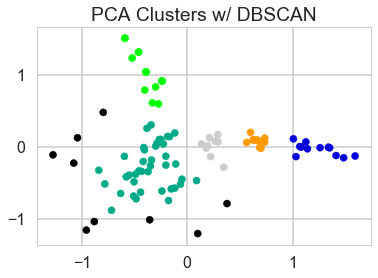

In [660]:
db = DBSCAN(min_samples=4, eps=0.25).fit(pc)
db_labels = db.labels_
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
silhouette_avg = silhouette_score(pc, db_labels)
plt.scatter(df_pca['x'],df_pca['y'], c=db_labels, s=50)
plt.title('PCA Clusters w/ DBSCAN')        
print("Number of clusters =", n_clusters_,"The best average silhouette_score is: %0.3f" % silhouette_avg)

After some optimization, DBSCAN is able to produce 5 clusters and separate out some points as outliers.

### Summary



<table border="1">

<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>

1. <b>Affinity propagation</b>

    The clustering algorithm produced 10 clusters and has a silhouette score of 0.506. Visually, the clustering seems reasonable. However, the silhouette score does not exceed KMeans method. <p>

2. <b>Spectral clustering</b>

    With the same ideal number of clusters as KMeans, spectral clustering yields similar result. In comparison, the best silhouette score of KMeans clustering is 0.5303 and spectral clustering is 0.5279.<p>

3. <b>Agglomerative clustering</b>

    Out of all of the tested algorithms, agglomerative clustering yields the highest silhouette score. The default ward linkage and average linkage methods produced the same silhouette score of 0.5312, which is higher than the KMeans result from previous exercise, but the difference is almost insignificant.<p>

4. <b>DBSCAN</b>

    Since DBSCAN is very sensitive to parameters, it would take some work to optimize the parameters for the data. However, it produced nice clustering that is different to other algorithms tested in this exercise. In addition, it is the only algorithm that is able to separate out outliers from the clusters.


Over all, due to the size of samples and its complexity, the clustering algorithms produce similar results other than DBSCAN. The reason is that the parameters of the first three algorithms are similar compared to DBSCAN, therefore the resulting clusters are similar.